In [1]:
import networkx as nx
from itertools import product
import numpy as np
from copy import deepcopy

# 3

In [2]:
G=nx.Graph()

In [3]:
G.add_nodes_from(['A', 'B', 'C', 'D'])
G.add_edges_from([('A', 'B', {'cost': lambda x: x}),
                  ('A', 'C', {'cost': lambda x: 10}),
                  ('C', 'B', {'cost': lambda x: x}),
                  ('B', 'D', {'cost': lambda x: 10}),
                  ('C', 'D', {'cost': lambda x: x})])

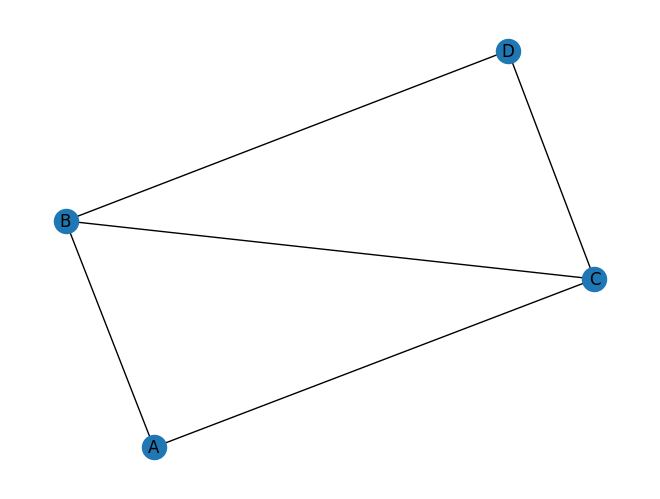

In [4]:
nx.draw(G, with_labels=True)

In [5]:
# impossible_paths = [['A', 'C', 'B', 'D']]
impossible_paths = []
possible_paths = []
for path in nx.all_simple_paths(G, 'A', 'D'):
    if path in impossible_paths:
        continue
    possible_paths += [path]

possible_paths

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'B', 'D'], ['A', 'C', 'D']]

In [6]:
def find_nlets(lst, n, given_sum):

    def valid(val):
        return sum(val) == given_sum

    return list(filter(valid, list(product(lst, repeat=n))))

find_nlets(list(range(11)), 3, 10)

[(0, 0, 10),
 (0, 1, 9),
 (0, 2, 8),
 (0, 3, 7),
 (0, 4, 6),
 (0, 5, 5),
 (0, 6, 4),
 (0, 7, 3),
 (0, 8, 2),
 (0, 9, 1),
 (0, 10, 0),
 (1, 0, 9),
 (1, 1, 8),
 (1, 2, 7),
 (1, 3, 6),
 (1, 4, 5),
 (1, 5, 4),
 (1, 6, 3),
 (1, 7, 2),
 (1, 8, 1),
 (1, 9, 0),
 (2, 0, 8),
 (2, 1, 7),
 (2, 2, 6),
 (2, 3, 5),
 (2, 4, 4),
 (2, 5, 3),
 (2, 6, 2),
 (2, 7, 1),
 (2, 8, 0),
 (3, 0, 7),
 (3, 1, 6),
 (3, 2, 5),
 (3, 3, 4),
 (3, 4, 3),
 (3, 5, 2),
 (3, 6, 1),
 (3, 7, 0),
 (4, 0, 6),
 (4, 1, 5),
 (4, 2, 4),
 (4, 3, 3),
 (4, 4, 2),
 (4, 5, 1),
 (4, 6, 0),
 (5, 0, 5),
 (5, 1, 4),
 (5, 2, 3),
 (5, 3, 2),
 (5, 4, 1),
 (5, 5, 0),
 (6, 0, 4),
 (6, 1, 3),
 (6, 2, 2),
 (6, 3, 1),
 (6, 4, 0),
 (7, 0, 3),
 (7, 1, 2),
 (7, 2, 1),
 (7, 3, 0),
 (8, 0, 2),
 (8, 1, 1),
 (8, 2, 0),
 (9, 0, 1),
 (9, 1, 0),
 (10, 0, 0)]

In [7]:
def edge_in_path(e, p):
    for e1 in zip(p[:-1], p[1:]):
        if e1 == e:
            return True
    return False

def expected_cost(flow, costs):
    return sum([f * c for f, c in zip(flow, costs)])

results = []
for flow_division in find_nlets(list(range(11)), 4, 10):
    costs = {}
    for e in G.edges:
        edge_flow = 0
        for flow, path in zip(flow_division, possible_paths):
            if edge_in_path(e, path):
                edge_flow += flow
        costs[e] = G.get_edge_data(*e)['cost'](edge_flow)
    path_costs = [0] * len(possible_paths)
    for i, path in enumerate(possible_paths):
        for e in zip(path[:-1], path[1:]):
            try:
                path_costs[i] += costs[e]
            except KeyError:
                path_costs[i] += costs[(e[1], e[0])]
    results += [{'flow': flow_division,
                 'costs': path_costs}]

In [8]:
expected_costs = np.array([expected_cost(r['flow'], r['costs']) for r in results])
expected_costs

array([200, 191, 184, 179, 176, 175, 176, 179, 184, 191, 200, 182, 175,
       170, 167, 166, 167, 170, 175, 182, 191, 168, 163, 160, 159, 160,
       163, 168, 175, 184, 158, 155, 154, 155, 158, 163, 170, 179, 152,
       151, 152, 155, 160, 167, 176, 150, 151, 154, 159, 166, 175, 152,
       155, 160, 167, 176, 158, 163, 170, 179, 168, 175, 184, 182, 191,
       200, 192, 184, 178, 174, 172, 172, 174, 178, 184, 192, 176, 170,
       166, 164, 164, 166, 170, 176, 184, 164, 160, 158, 158, 160, 164,
       170, 178, 156, 154, 154, 156, 160, 166, 174, 152, 152, 154, 158,
       164, 172, 152, 154, 158, 164, 172, 156, 160, 166, 174, 164, 170,
       178, 176, 184, 192, 188, 181, 176, 173, 172, 173, 176, 181, 188,
       174, 169, 166, 165, 166, 169, 174, 181, 164, 161, 160, 161, 164,
       169, 176, 158, 157, 158, 161, 166, 173, 156, 157, 160, 165, 172,
       158, 161, 166, 173, 164, 169, 176, 174, 181, 188, 188, 182, 178,
       176, 176, 178, 182, 188, 176, 172, 170, 170, 172, 176, 18

In [9]:
possible_paths

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'B', 'D'], ['A', 'C', 'D']]

In [10]:
results[np.where(expected_costs == np.min(expected_costs))[0][0]]

{'flow': (0, 5, 0, 5), 'costs': [10, 15, 20, 15]}

In [11]:
costs = np.array([r['costs'] for r in results])
costs

array([[10, 10, 20, 20],
       [ 9, 10, 20, 19],
       [ 8, 10, 20, 18],
       ...,
       [27, 19, 29, 19],
       [28, 20, 29, 19],
       [30, 20, 30, 20]])

In [12]:
flows = np.array([r['flow'] for r in results])
flows

array([[ 0,  0,  0, 10],
       [ 0,  0,  1,  9],
       [ 0,  0,  2,  8],
       ...,
       [ 9,  0,  1,  0],
       [ 9,  1,  0,  0],
       [10,  0,  0,  0]])

In [13]:
from price_of_anarchy import eval_flow_costs

results = eval_flow_costs(G, 'A', 'D')

In [14]:
def check_for_ne(flow, results):
    is_ne = True
    costs = [r for r in results if r['flow'] == tuple(flow)][0]['costs']
    for i in range(len(flow)):
        for j in range(len(flow)):
            # we take one from i-th position and add one to j-th position
            if flow[i] == 0 or j == i:
                continue
            new_flow = deepcopy(flow)
            new_flow[i] -= 1
            new_flow[j] += 1
            possible_results = [r for r in results if r['flow'] == tuple(new_flow)]
            if possible_results[0]['costs'][j] < costs[i]:
                # Has incentive to change
                is_ne = False
                break
        if is_ne is False:
            break
    return is_ne


check_for_ne([1, 4, 0, 5], results)

False

In [15]:
for r in results:
    if check_for_ne(list(r['flow']), results):
        print(r['flow'], r['costs'])

(2, 4, 0, 4) [14, 16, 22, 16]
(3, 3, 0, 4) [16, 16, 23, 17]
(3, 4, 0, 3) [16, 17, 23, 16]


In [16]:
possible_paths

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'B', 'D'], ['A', 'C', 'D']]

# 4

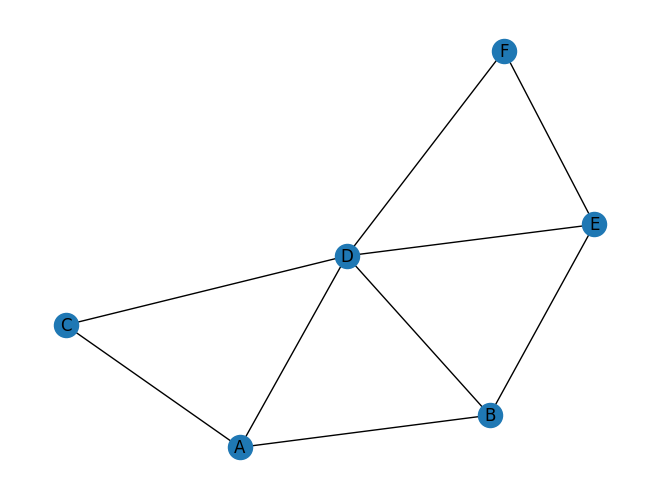

In [17]:
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B', {'cost': lambda x: 10}),
                  ('A', 'C', {'cost': lambda x: x}),
                  ('C', 'D', {'cost': lambda x: 10}),
                  ('A', 'D', {'cost': lambda x: x}),
                  ('B', 'D', {'cost': lambda x: x}),
                  ('B', 'E', {'cost': lambda x: 2*x}),
                  ('D', 'E', {'cost': lambda x: 2*x}),
                  ('D', 'F', {'cost': lambda x: x}),
                  ('F', 'E', {'cost': lambda x: 10})])
nx.draw(G, with_labels=True)

In [18]:
[p for p in nx.all_simple_paths(G, 'A', 'E')]

[['A', 'B', 'D', 'E'],
 ['A', 'B', 'D', 'F', 'E'],
 ['A', 'B', 'E'],
 ['A', 'C', 'D', 'B', 'E'],
 ['A', 'C', 'D', 'E'],
 ['A', 'C', 'D', 'F', 'E'],
 ['A', 'D', 'B', 'E'],
 ['A', 'D', 'E'],
 ['A', 'D', 'F', 'E']]

In [40]:
impossible_paths = [
    # ['A', 'C', 'D', 'F', 'E'],
    # ['A', 'B', 'D', 'F', 'E'],
    ['A', 'C', 'D', 'B', 'E']
]

In [46]:
possible_paths = []
for path in nx.all_simple_paths(G, 'A', 'E'):
    if path in impossible_paths:
        continue
    possible_paths += [path]

possible_paths

[['A', 'B', 'D', 'E'],
 ['A', 'B', 'D', 'F', 'E'],
 ['A', 'B', 'E'],
 ['A', 'C', 'D', 'E'],
 ['A', 'C', 'D', 'F', 'E'],
 ['A', 'D', 'B', 'E'],
 ['A', 'D', 'E'],
 ['A', 'D', 'F', 'E']]

In [41]:
results = eval_flow_costs(G, 'A', 'E', impossible_paths)

In [42]:
expected_costs = np.array([expected_cost(r['flow'], r['costs']) for r in results])
results[np.where(expected_costs == np.min(expected_costs))[0][0]]

{'flow': (0, 0, 4, 0, 0, 0, 4, 2), 'costs': [18, 22, 18, 18, 22, 14, 14, 18]}

In [43]:
np.min(expected_costs)

164

In [44]:
for r in results:
    if check_for_ne(list(r['flow']), results):
        print(r['flow'], r['costs'])

(0, 0, 0, 0, 0, 5, 5, 0) [20, 20, 20, 20, 20, 20, 20, 20]
(0, 0, 1, 0, 0, 4, 5, 0) [20, 20, 20, 20, 20, 19, 19, 19]


In [47]:
possible_paths

[['A', 'B', 'D', 'E'],
 ['A', 'B', 'D', 'F', 'E'],
 ['A', 'B', 'E'],
 ['A', 'C', 'D', 'E'],
 ['A', 'C', 'D', 'F', 'E'],
 ['A', 'D', 'B', 'E'],
 ['A', 'D', 'E'],
 ['A', 'D', 'F', 'E']]

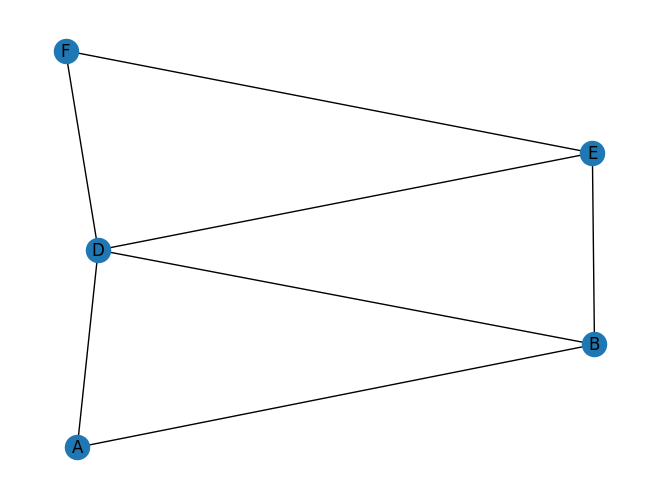

In [48]:
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B', {'cost': lambda x: 10}),
                  ('A', 'D', {'cost': lambda x: x}),
                  ('B', 'D', {'cost': lambda x: x}),
                  ('B', 'E', {'cost': lambda x: 2*x}),
                  ('D', 'E', {'cost': lambda x: 2*x}),
                  ('D', 'F', {'cost': lambda x: x}),
                  ('F', 'E', {'cost': lambda x: 10})])
nx.draw(G, with_labels=True)

In [49]:
[p for p in nx.all_simple_paths(G, 'A', 'E')]

[['A', 'B', 'D', 'E'],
 ['A', 'B', 'D', 'F', 'E'],
 ['A', 'B', 'E'],
 ['A', 'D', 'B', 'E'],
 ['A', 'D', 'E'],
 ['A', 'D', 'F', 'E']]

In [50]:
results = eval_flow_costs(G, 'A', 'E')

In [51]:
expected_costs = np.array([expected_cost(r['flow'], r['costs']) for r in results])
results[np.where(expected_costs == np.min(expected_costs))[0][0]]

{'flow': (0, 0, 4, 0, 4, 2), 'costs': [18, 22, 18, 14, 14, 18]}

In [52]:
np.min(expected_costs)


164

In [53]:
for r in results:
    if check_for_ne(list(r['flow']), results):
        print(r['flow'], r['costs'])
possible_paths

(0, 0, 0, 5, 5, 0) [20, 20, 20, 20, 20, 20]
(0, 0, 1, 4, 5, 0) [20, 20, 20, 19, 19, 19]


[['A', 'B', 'D', 'E'],
 ['A', 'B', 'D', 'F', 'E'],
 ['A', 'B', 'E'],
 ['A', 'C', 'D', 'E'],
 ['A', 'C', 'D', 'F', 'E'],
 ['A', 'D', 'B', 'E'],
 ['A', 'D', 'E'],
 ['A', 'D', 'F', 'E']]